# Import dependencies

In [1]:
import os
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image

from nltk.stem import *
from nltk.corpus import stopwords
from wordcloud import WordCloud

from config import student_dict

# Retrieve and load corpus

In [2]:
master_df= pd.read_csv("survey_responses.csv") 

# Set paths

In [9]:
cwd= os.getcwd()

plot_path= os.path.join(cwd,"plots")

# Housekeeping

In [4]:
# De-identify names
master_df["student"].replace(student_dict, inplace= True)

## Remove nbsp (chr(160)) and fancy puncuation

In [5]:
master_df["response"].replace(chr(160),"", regex= True, inplace= True)
master_df["response"].replace([chr(8217),chr(8216)],"\'", regex= True, inplace= True)
master_df["response"].replace([chr(8220),chr(8221)],"\"", regex= True, inplace= True)

## make all text lowercased

In [6]:
master_df["response"]= master_df["response"].apply(lambda x: x.lower())

## Remove researcher's speech and store it in a separate column

In [7]:
pattern= re.compile("(\(.*\))")

master_df["researcher"]= master_df["response"].apply(lambda x: re.findall(pattern, x))
master_df["response"]= master_df["response"].apply(lambda x: re.sub(pattern, "", x))

In [8]:
master_df.head()

,student,q_number,response,researcher
0,Student 1,1,"to be kind, i guess. i don't know. like, what ...",[(what taught you that in this program?)]
1,Student 1,2,speaking louder because i'm a quiet talker aro...,[]
2,Student 1,3,speak louder. to just say we only have four w...,[(how did you push through it?)]
3,Student 1,4,i feel like i got more nicer. hopefully.,[(and you're going to carry that into your cla...
4,Student 1,5,it's different cause when im in my own class i...,[]


In [10]:
master_df.iloc[0,2]

"to be kind, i guess. i don't know. like, what i learned was to be nice to people and stop being mean all the time.  how nice the kids are."

# Make the WordCloud

In [11]:
# Define stopwords to remove
tb_stopwords= stopwords.words("english")
tb_stopwords= tb_stopwords + [
    "like","re","ll","i'm","i've","i'll","they're","don't","we're","that's","im","ill","cause","because",
    "probably","well","thing","something","got", "yeah","ive","ill","theyre","dont","were","thats","really",
    "lot","usually","youre","kinda","gonna"
]

In [12]:
# Define punctuation to remove
punc_list= [
    ".",
    ",",
    "?",
    "!",
    ":",
    ";",
    "\"",
    "\'",
    "-"
]

def response_to_cloud(
    pd_series_of_str,
    punc_list,
    remove_stops= True,
    max_words= 20,
    show= True,
    save= False,
    save_filename= None
):
    
    # Make one blob of text
    text= " ".join([response for response in pd_series_of_str])
    
    # Remove punctuation from the blob
    text= "".join([char for char in text if char not in punc_list])

    if remove_stops == True:
        # Remove stopwords from the blob
        text= " ".join([word for word in text.split(" ") if word not in tb_stopwords])
    
    # Generate and display WordCloud
    wordcloud= WordCloud(
        background_color= "white",
        max_words= max_words,
        contour_width= "500",
        contour_color= "black"
    ).generate(text)
    
    if save == True:
        try:
            wordcloud.to_file(os.path.join(plot_path,save_filename))
        except Exception as e:
            print("No name provided. Please run this again and provide a value for 'save_filename' argument.")
    
    if show == True:
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

def just_the_text_please(
    pd_series_of_str,
    punc_list,
    remove_stops= True
):
    # Make one blob of text
    text= " ".join([response for response in pd_series_of_str])
    
    # Remove punctuation from the blob
    text= "".join([char for char in text if char not in punc_list])

    if remove_stops == True:
        # Remove stopwords from the blob
        text= " ".join([word for word in text.split(" ") if word not in tb_stopwords])
    
    return text

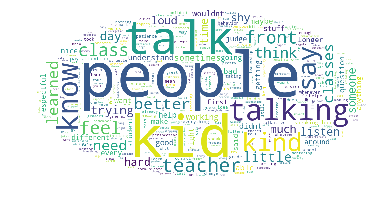

In [13]:
mask= np.array(Image.open('oval.png'))
text= just_the_text_please(master_df["response"], punc_list)
save_filename= "all_responses_oval.png"

# Generate and display WordCloud
wordcloud= WordCloud(
    background_color= "white",
    max_words= 500,
    mask= mask
).generate(text)

wordcloud.to_file(os.path.join(plot_path,save_filename))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [14]:
for student in master_df["student"].unique():
    response_to_cloud(
        master_df.loc[master_df["student"] == student, "response"],
        punc_list,
        max_words= 50,
        save= True,
        save_filename= student.upper() + "response_cloud.png",
        show= False
    )

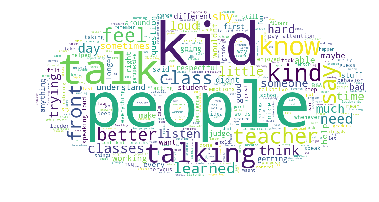

In [15]:
mask= np.array(Image.open('oval.png'))
max_words= 500
text= just_the_text_please(master_df["response"], punc_list)

wordcloud= WordCloud(
    background_color= "white",
    max_words= max_words,
    mask= mask
).generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Word Counts

In [16]:
text= just_the_text_please(master_df["response"], punc_list)

word_dict= {}
for word in text.split(" "):
    if word not in word_dict.keys():
        word_dict[word]= 1
    else:
        word_dict[word]+= 1

filtered_word_dict= {k: v for k, v in sorted(word_dict.items(), key=lambda item: item[1], reverse= True) if word_dict[k] > 5}

[Text(0,0,'people'),
 Text(0,0,''),
 Text(0,0,'kids'),
 Text(0,0,'talk'),
 Text(0,0,'talking'),
 Text(0,0,'know'),
 Text(0,0,'kind'),
 Text(0,0,'say'),
 Text(0,0,'feel'),
 Text(0,0,'front'),
 Text(0,0,'class'),
 Text(0,0,'loud'),
 Text(0,0,'get'),
 Text(0,0,'better'),
 Text(0,0,'learned'),
 Text(0,0,'would'),
 Text(0,0,'think'),
 Text(0,0,'classes'),
 Text(0,0,'little'),
 Text(0,0,'need'),
 Text(0,0,'trying'),
 Text(0,0,'teacher'),
 Text(0,0,'shy'),
 Text(0,0,'could'),
 Text(0,0,'much'),
 Text(0,0,'teachers'),
 Text(0,0,'listen'),
 Text(0,0,'hard'),
 Text(0,0,'sometimes')]

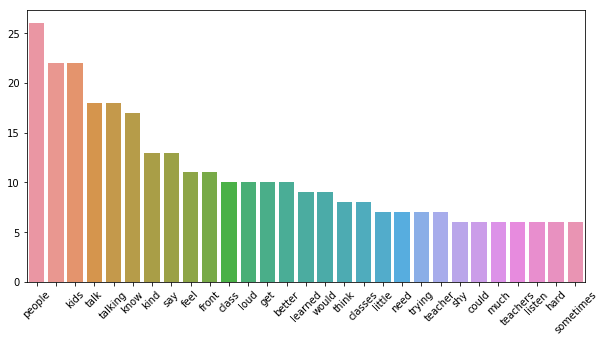

In [17]:
x= []
y= []

for k,v in filtered_word_dict.items():
    x.append(k)
    y.append(v)

fig, ax= plt.subplots(figsize= (10,5))
plot= sns.barplot(x,y, ax= ax)
plot.set_xticklabels(x,rotation=45)

In [18]:
def plot_word_counts(series, min_count= 5, save= False, save_filename= None, figsize= (10,5), color= None, palette= None):
    text= just_the_text_please(series, punc_list)

    word_dict= {}
    for word in text.split(" "):
        if word not in word_dict.keys():
            word_dict[word]= 1
        else:
            word_dict[word]+= 1

    filtered_word_dict= {k: v for k, v in sorted(word_dict.items(), key=lambda item: item[1], reverse= True) if word_dict[k] > min_count}
    
    if "" in filtered_word_dict.keys():
        filtered_word_dict.pop("")
    
    x= []
    y= []

    for k,v in filtered_word_dict.items():
        x.append(k)
        y.append(v)
    
    fig, ax= plt.subplots(figsize= figsize)
    plot= sns.barplot(x,y, ax= ax, color= color, palette= palette)
    plot.set_xticklabels(x,rotation=45)
    
    if save == True:
        try:
            plt.savefig(os.path.join(plot_path,save_filename))
        except Exception as e:
            print(e)
            print("No name provided. Please run this again and provide a value for 'save_filename' argument.")

## All responses

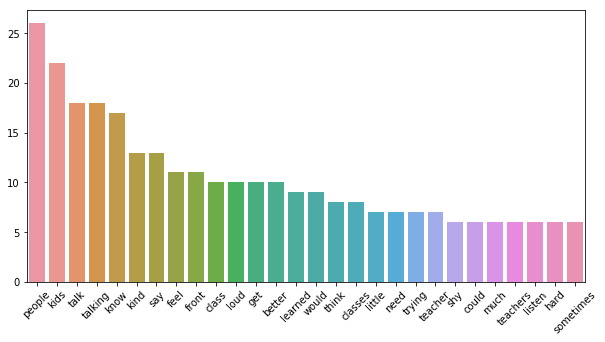

In [19]:
plot_word_counts(
    master_df["response"],
    save= True,
    save_filename= "all_responses_word_count.png"
)

## By Question Number

Insufficient word counts for Question 7.


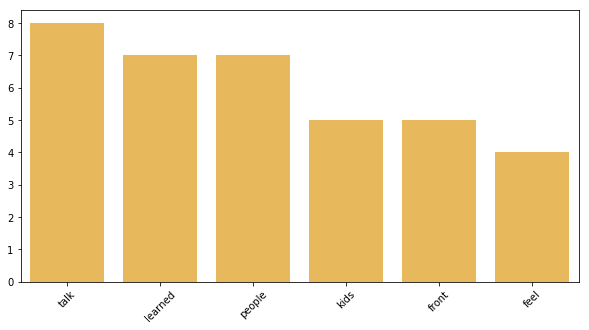

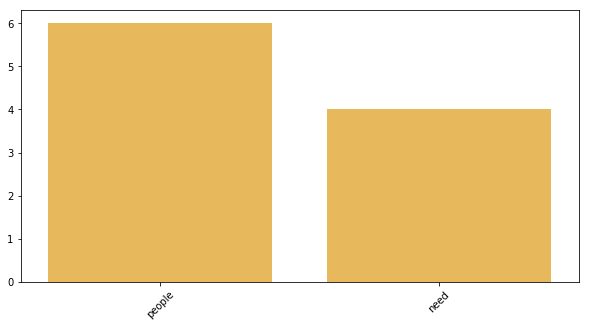

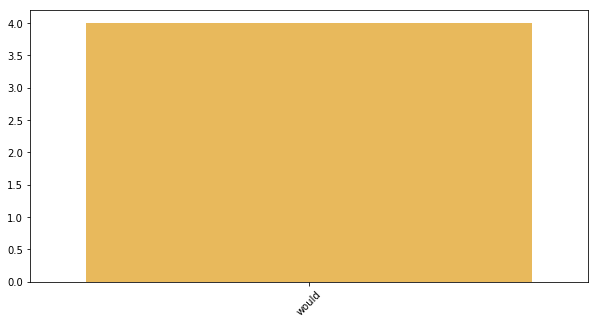

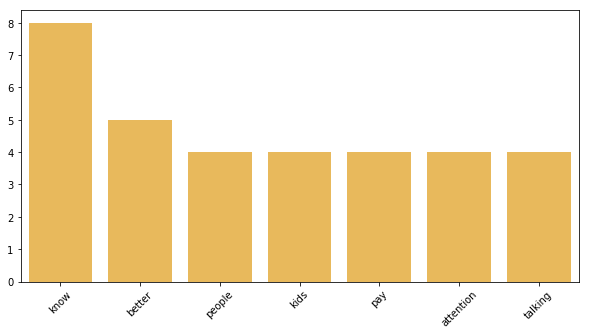

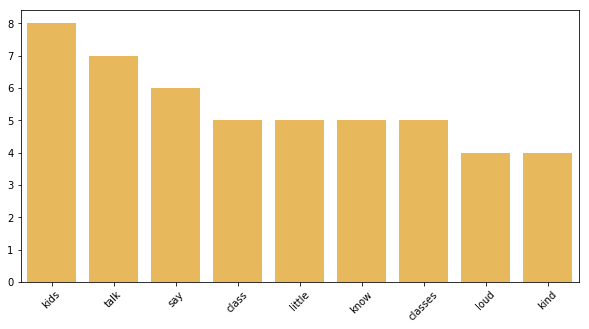

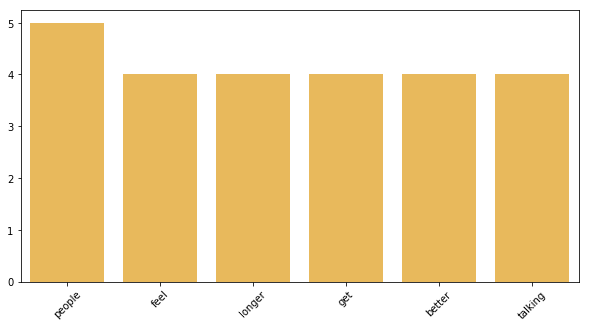

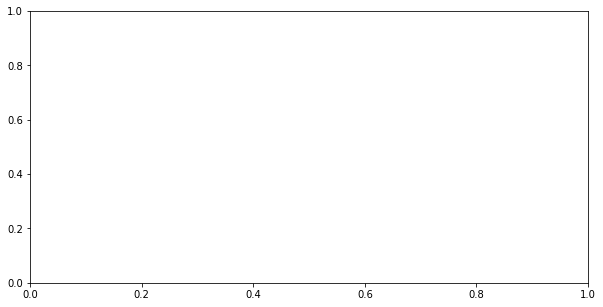

In [20]:
for num in master_df["q_number"].unique():
    try:
        plot_word_counts(
            master_df.loc[master_df["q_number"] == num,"response"],
            save= True,
            save_filename= "question_"+str(num)+"_word_count.png",
            color= "#ffc145",
            min_count= 3
        )
    except:
        print("Insufficient word counts for Question "+str(num)+".")

## By Interview

Insufficient word counts for Student 1.


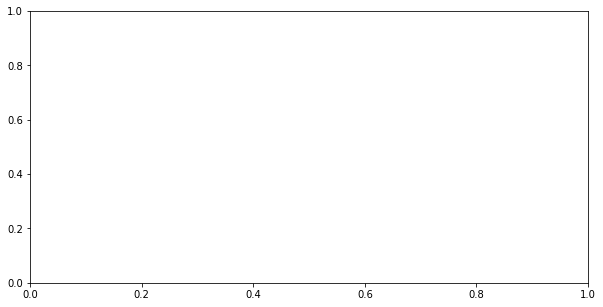

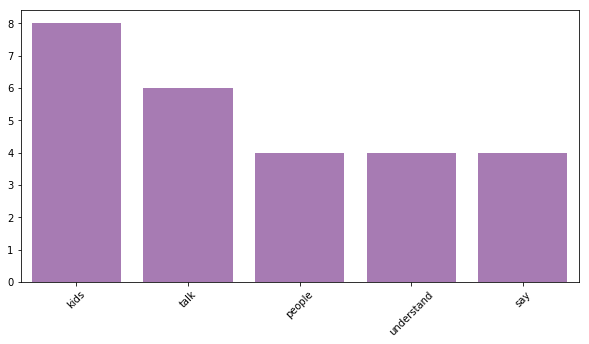

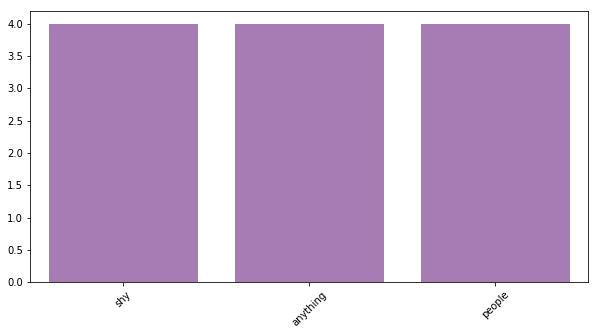

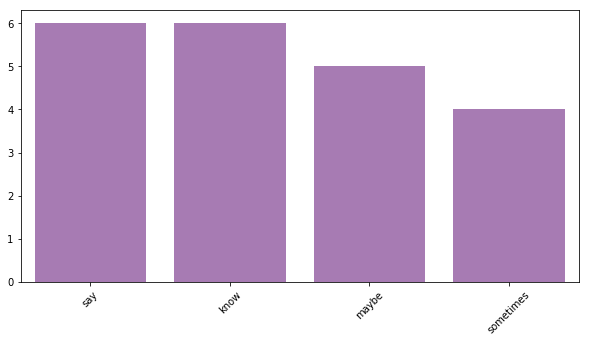

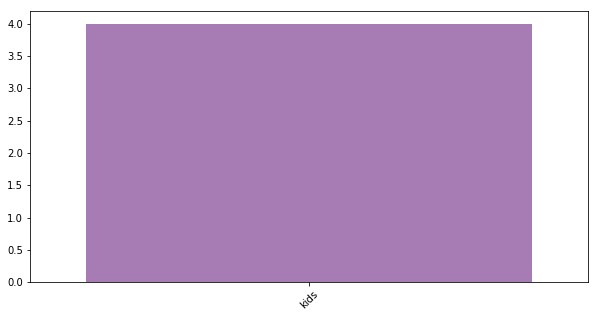

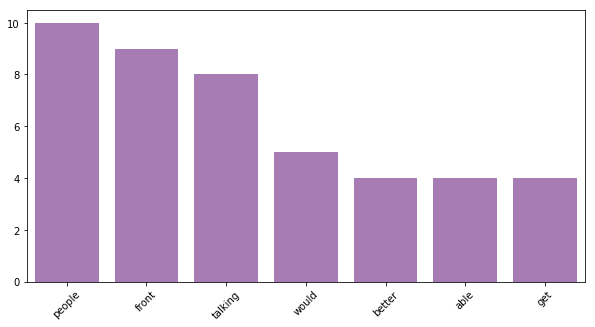

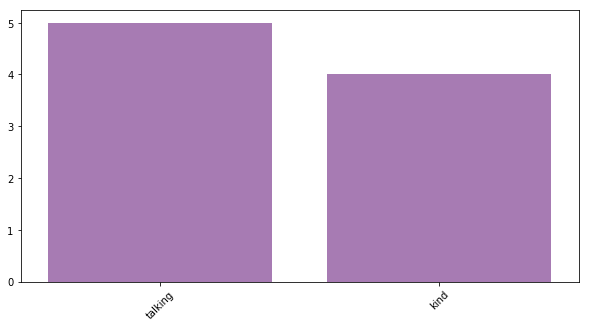

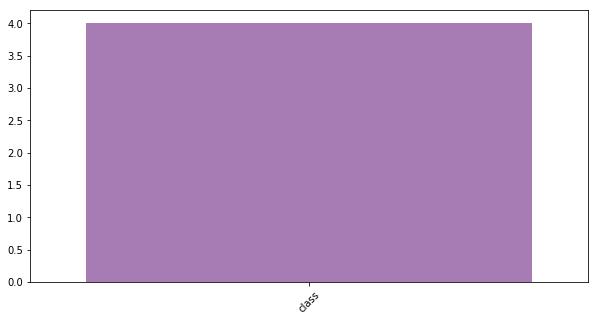

In [21]:
for student in master_df["student"].unique():
    try:
        plot_word_counts(
            master_df.loc[master_df["student"] == student,"response"],
            save= True,
            save_filename= student+"_word_count.png",
            color= "#ac71bd",
            min_count= 3
        )
    except:
        print("Insufficient word counts for "+student+".")